In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.ensemble import BaggingClassifier,VotingClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

import warnings

warnings.filterwarnings('ignore')

In [4]:
cancer=pd.read_csv("BreastCancer.csv",index_col=0)
lbl=LabelEncoder()
cancer['Class']=lbl.fit_transform(cancer['Class'])
cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1
95719,6,10,10,10,8,10,7,10,7,1
128059,1,1,1,1,2,5,5,1,1,0


In [5]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [6]:
gbc = GradientBoostingClassifier(random_state=23)
params={'max_depth':[2,3,4,5,6,None],
        'learning_rate':np.linspace(0.001,0.999,10),
        'n_estimators':[50,100,150]}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [7]:
gcv=GridSearchCV(gbc,param_grid=params,cv=kfold,scoring="neg_log_loss")
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=23),
             param_grid={'learning_rate': array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ]),
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_log_loss')

In [8]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'learning_rate': 0.11188888888888888, 'max_depth': 3, 'n_estimators': 50}
best score : -0.12427762967035216


In [9]:
y_pred = gcv.predict(X)

In [10]:
bm_gbc = gcv.best_estimator_

In [11]:
df_imp = pd.DataFrame({'variable':bm_gbc.feature_names_in_,
                       "importance":bm_gbc.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by ='importance')

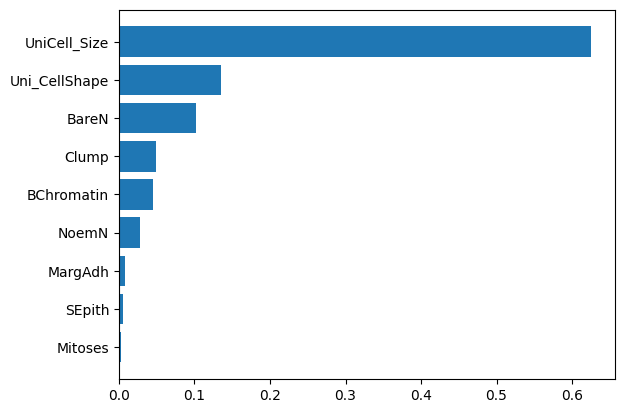

In [12]:
plt.barh(df_imp.variable,df_imp.importance);